# Core Statistics Using Python
### Hana Choi, Simon Business School, University of Rochester


# Data Description and Visualization in Python

## Topics covered

- Descriptive statistics
- Data visualization with Python

## Required packages

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (Optional) Seaborn package
# Seaborn is built on top of Matpotlib and provides a high-level interface for 
# creating more attractive and informative statistical graphics with less effort.
import seaborn as sns

# Example: Diamonds
We will load the diamonds dataset and perform basic descriptive statistics and visualizations.

## Data: diamonds.csv

In [13]:
# Method 1: Save the data file directly to your working directory
# diamonds = pd.read_csv('diamonds.csv')

# Method 2: Tell Python where your data file exists "explicitly"
# Below is "my" file path, you should specify yours instead.
diamonds = pd.read_csv("/Users/hanachoi/Dropbox/teaching/core_statistics/Data/diamonds.csv")

# Method 3: We can also import a dataset from the web
# diamonds = pd.read_csv("http://hanachoi.github.io/datasets/diamonds.csv")

# Display the first few rows of the dataframe
print(diamonds.head())

   color  carats  price
0      1    0.75   2050
1      1    1.00   4263
2      1    1.00   4272
3      1    1.01   4372
4      1    1.01   4372


## Check the data types

The ``dtypes`` attribute provides the data type for each column in the DataFrame.

In [14]:
print(diamonds.dtypes)

print('----')
print(diamonds.info())

color       int64
carats    float64
price       int64
dtype: object
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   color   380 non-null    int64  
 1   carats  380 non-null    float64
 2   price   380 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.0 KB
None


## Basic descriptive statistics

In [15]:
print(diamonds.describe())

            color      carats        price
count  380.000000  380.000000   380.000000
mean     0.813158    1.025474  4036.076316
std      0.390299    0.152047  1052.921440
min      0.000000    0.700000  1575.000000
25%      1.000000    1.000000  3378.250000
50%      1.000000    1.030000  4119.500000
75%      1.000000    1.130000  4690.000000
max      1.000000    1.300000  7698.000000


### You can also look at specific statistics

In [16]:
# Mean
diamonds.mean()

color        0.813158
carats       1.025474
price     4036.076316
dtype: float64

In [17]:
# Standard deviation
diamonds.std()

color        0.390299
carats       0.152047
price     1052.921440
dtype: float64

In [18]:
# You can also compute the median, which was not reported by .describe()
diamonds.median()

color        1.00
carats       1.03
price     4119.50
dtype: float64

## Visualization

### Basic histogram
We can create a histogram to visualize the distribution of the diamonds dataset.

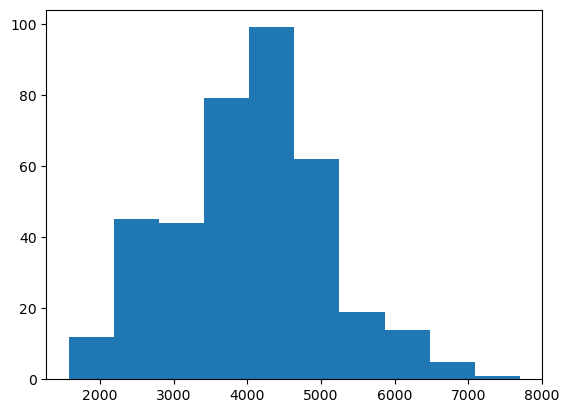

In [19]:
# Plotting a histogram of the diamond prices
plt.hist(diamonds['price'])
plt.show()

### Fancier histogram

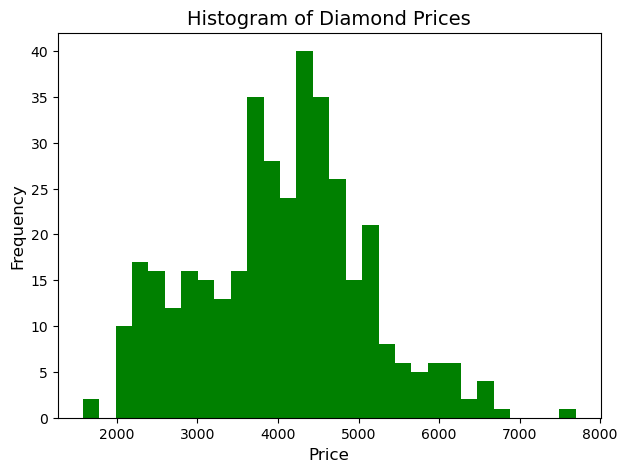

In [20]:
# Setting the size of the figure in inches
plt.figure(figsize=(7, 5))

# Create the histogram with bin size = 30
plt.hist(diamonds['price'], bins=30, color=['green'])
# sns.histplot(diamonds['price'], bins=30, kde=True, color='green') # using seaborn package

# Add labels and title
plt.title('Histogram of Diamond Prices', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

### Basic Scatterplot

We will create a scatter plot to examine the relationship between ``price`` and ``carats`` of diamonds.

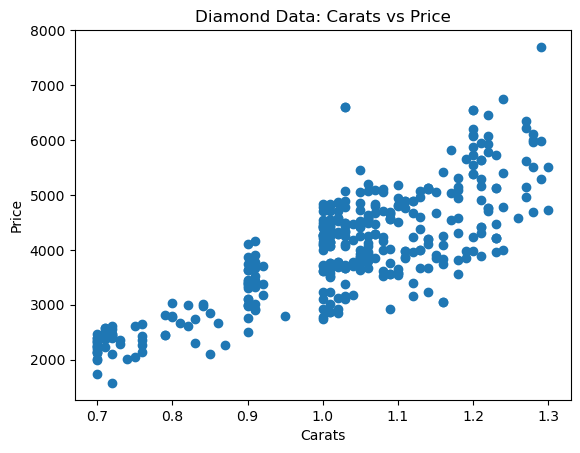

In [11]:
plt.plot(diamonds['carats'], diamonds['price'], 'o')
plt.title('Diamond Data: Carats vs Price')  
plt.xlabel('Carats')  
plt.ylabel('Price')
plt.show()

### Scatterplot with a regression line

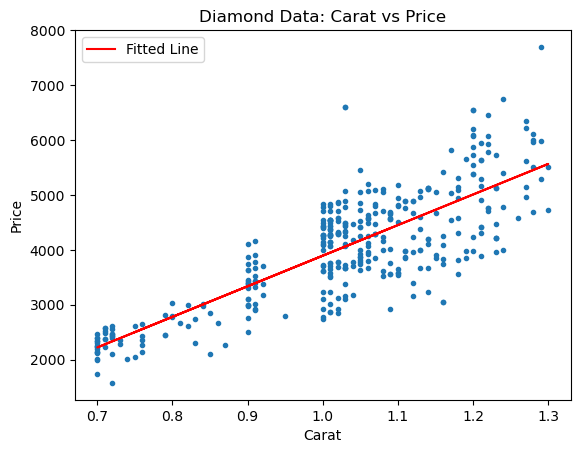

In [9]:
# Data: carats and price from the diamonds dataset
x_data = diamonds['carats']
y_data = diamonds['price']

# Step1: Create the scatter plot
plt.plot(x_data, y_data, '.')

# Step2: Fit a line using NumPy's polyfit 
# polyfit finds the coefficients (slope and intercept) of the line
slope, intercept = np.polyfit(x_data, y_data, 1) # 1 for linear fit

# Step3: Plot the fitted line
plt.plot(x_data, intercept + slope*x_data, '-', color='red', label='Fitted Line')

# Step4: Add labels, title, and a legend
plt.title('Diamond Data: Carat vs Price')  
plt.xlabel('Carat')  
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

### (Optional) Fancier scatter plot with a regression line using Seaborn

- You don't have to manually compute the slope and intercept (``np.polyfit``) as Seaborn's ``regplot()`` automatically fits the regression line.
- The plot looks more polished with the automatic addition of a confidence interval (which can be disabled with ``ci=None``).

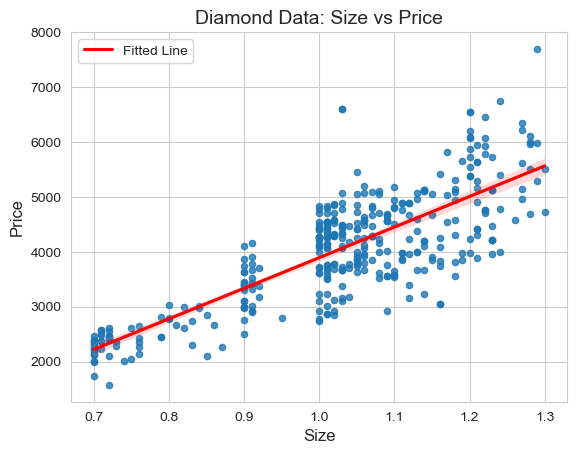

In [32]:
# Set the style for the plot (and the subsequent plots)
sns.set_style("whitegrid")

# Creatd the scatterplot with a regression line using regplot()
sns.regplot(x='carats', y='price', scatter_kws={'s': 20}, 
            line_kws={'color': 'red', 'label': 'Fitted Line'}, data=diamonds)

# Add labels and title
plt.title('Diamond Data: Size vs Price', fontsize=14)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Example: Titanic

- The limitation of scatter plots and correlations is they only work well for continuous variables (or, at least, ones that take on lots of values).
- What if some data are not numeric, or contain binary or categorical variables?
- A powerful method for capturing relationships when variables are binary or categorical is the crosstab or “pivot table”.


## Data: titanic.csv

In [17]:
# Method 1: Save the data file directly to your working directory
# titanic = pd.read_csv('titanic.csv')

# Method 2: Tell Python where your data file exists "explicitly"
# Below is "my" file path, you should specify yours instead.
titanic = pd.read_csv("/Users/hanachoi/Dropbox/teaching/core_statistics/Data/titanic.csv")

# Method 3: We can also import a dataset from the web
# titanic = pd.read_csv("http://hanachoi.github.io/datasets/titanic.csv")

# Display the first few rows of the dataframe
print(titanic.head())

         class    age gender survival
0  first class  adult   male      yes
1  first class  adult   male      yes
2  first class  adult   male      yes
3  first class  adult   male      yes
4  first class  adult   male      yes


## Constructing Crosstabs

### Gender vs survival

In [18]:
# Constructing a crosstab for gender vs survival to examine their relationships
crosstab = pd.crosstab(titanic['gender'], titanic['survival'])

# Display the crosstab
print(crosstab)

survival    no  yes
gender             
female     126  344
male      1364  367


### Bar Plot: Survival count by gender

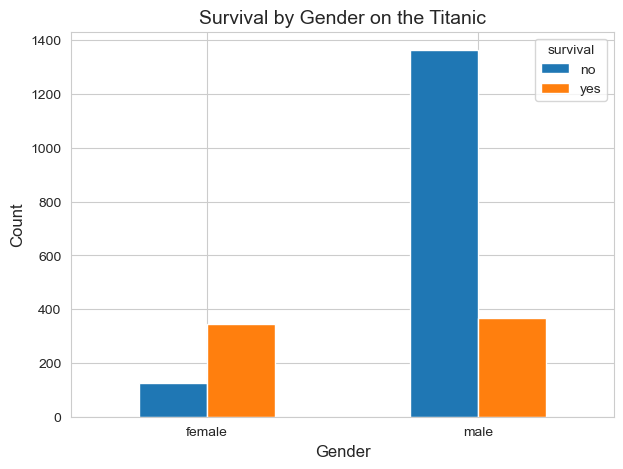

In [28]:
# Plot the crosstab as a bar plot
crosstab.plot(kind='bar', figsize=(7, 5))

# Add labels and title
plt.title('Survival by Gender on the Titanic', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0) # Ensures that the x-axis labels (genders) are displayed horizontally for better readability.

# Show the plot
plt.show()

### Display crosstab as proportions

In [20]:
# Display the crosstab cells as proportion of rows
crosstab_row = pd.crosstab(titanic['gender'], titanic['survival'], normalize='index')
print(crosstab_row)

print('----')
# Display the crosstab cells as proportion of columns
crosstab_col = pd.crosstab(titanic['gender'], titanic['survival'], normalize='columns')
print(crosstab_col)

survival        no       yes
gender                      
female    0.268085  0.731915
male      0.787984  0.212016
----
survival        no       yes
gender                      
female    0.084564  0.483826
male      0.915436  0.516174


### Bar Plot: Survival proportion by gender

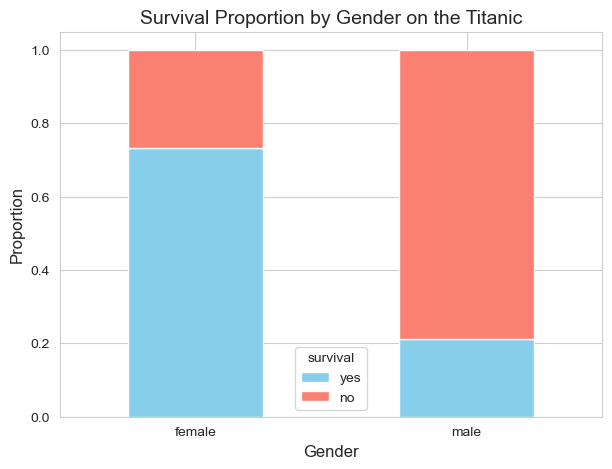

In [31]:
# Reorder the columns so survival= 'yes' comes first
crosstab_row = crosstab_row.reindex(columns=['yes', 'no'])

# Plot the crosstab as a bar plot
crosstab_row.plot(kind='bar', stacked=True, figsize=(7, 5), color=['skyblue', 'salmon'])

# Add labels and title
plt.title('Survival Proportion by Gender on the Titanic', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0) # Ensures that the x-axis labels (genders) are displayed horizontally for better readability.

# Show the plot
plt.show()

### How about the relationship among age, gender, class, and survival?

In [33]:
# Creating a crosstab with 'age', 'gender', 'class' as rows, and 'survival' as columns
crosstab_full = pd.crosstab([ titanic['age'], titanic['gender'], titanic['class'] ], titanic['survival'])
print(crosstab_full)

survival                    no  yes
age   gender class                 
adult female crew            3   20
             first class     4  140
             second class   13   80
             third class    89   76
      male   crew          670  192
             first class   118   57
             second class  154   14
             third class   387   75
young female first class     0    1
             second class    0   13
             third class    17   14
      male   first class     0    5
             second class    0   11
             third class    35   13
